In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import scipy as stats
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [8]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/01%20Auto%20Insurance%20Total%20Claims%20Dataset/auto-insurance.csv',header=None)
data

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [9]:
data.columns=['number of claims','total payment for all the claims in thousands of Swedish Kronor']

In [10]:
data

,number of claims,total payment for all the claims in thousands of Swedish Kronor
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [12]:
data.head(2)

,number of claims,total payment for all the claims in thousands of Swedish Kronor
0,108,392.5
1,19,46.2


In [13]:
data.tail(2)

,number of claims,total payment for all the claims in thousands of Swedish Kronor
61,53,244.6
62,26,187.5


In [14]:
data.shape

(63, 2)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   number of claims                                                 63 non-null     int64  
 1   total payment for all the claims in thousands of Swedish Kronor  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [16]:
data.describe()

,number of claims,total payment for all the claims in thousands of Swedish Kronor
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [17]:
data.isna().sum()

number of claims                                                   0
total payment for all the claims in thousands of Swedish Kronor    0
dtype: int64

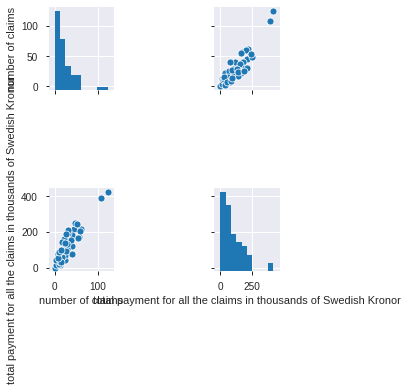

In [18]:
sns.pairplot(data)

In [19]:
pandas_profiling.ProfileReport(data)

In [21]:
data.columns

Index(['number_of_claims', 'total_payment_for_all_the_claims_in_thousands_of_Swedish_Kronor'], dtype='object')

In [22]:
x_data=data['number_of_claims']

In [23]:
x_data

0     108
1      19
2      13
3     124
4      40
     ... 
58      9
59     31
60     14
61     53
62     26
Name: number_of_claims, Length: 63, dtype: int64

In [26]:
y_data=data['total_payment_for_all_the_claims_in_thousands_of_Swedish_Kronor']

In [27]:
y_data

0     392.5
1      46.2
2      15.7
3     422.2
4     119.4
      ...  
58     87.4
59    209.8
60     95.5
61    244.6
62    187.5
Name: total_payment_for_all_the_claims_in_thousands_of_Swedish_Kronor, Length: 63, dtype: float64

In [88]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(x_data,y_data,test_size=0.20,random_state=5)

In [89]:
lr=LinearRegression()

In [90]:
lr.fit(X_traine.values.reshape(-1,1),Y_traine)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
X_traine.shape

(50,)

In [92]:
Y_traine.shape

(50,)

In [93]:
X_test.shape

(13,)

In [94]:
Y_test.shape

(13,)

In [138]:
lr.coef_

array([3.61859636])

In [139]:
lr.intercept_

17.182550104078473

In [95]:
train_score=lr.score(X_traine.values.reshape(-1,1),Y_traine)
train_score

0.8087738927837383

In [96]:
test_score=lr.score(X_test.values.reshape(-1,1),Y_test)
test_score

0.8731477040981387

In [114]:
rr=Ridge(alpha=0.01)
rr.fit(X_traine.values.reshape(-1,1),Y_traine)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [140]:
rr.coef_

array([3.61841496])

In [141]:
rr.intercept_

17.186446709057947

In [115]:
rr100=Ridge(alpha=100) #comparison with alpha value
rr100.fit(X_traine.values.reshape(-1,1),Y_traine)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [142]:
rr100.coef_

array([3.60054533])

In [143]:
rr100.intercept_

17.570286254743948

In [119]:
Ridge_train_score=rr.score(X_traine.values.reshape(-1,1),Y_traine)
Ridge_train_score

0.8087738927835351

In [120]:
Ridge_test_score=rr.score(X_test.values.reshape(-1,1),Y_test)
Ridge_test_score

0.8731478788114476

In [121]:
Ridge_train_score100=rr.score(X_traine.values.reshape(-1,1),Y_traine)
Ridge_train_score100

0.8087738927835351

In [122]:
Ridge_test_score100=rr.score(X_test.values.reshape(-1,1),Y_test)
Ridge_test_score100

0.8731478788114476

In [146]:
lo=Lasso(alpha=(0.01)**2)
lo.fit(X_traine.values.reshape(-1,1),Y_traine)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [148]:
lo.coef_

array([3.61859611])

In [149]:
lo.intercept_

17.182555488487182

In [147]:
lo100=Lasso(alpha=(100)**2)
lo100.fit(X_traine.values.reshape(-1,1),Y_traine)


Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [150]:
lo100.coef_

array([0.])

In [151]:
lo100.intercept_

94.91

In [158]:
Lasso_train_score=lo.score(X_traine.values.reshape(-1,1),Y_traine)
Lasso_train_score

0.8087738927837345

In [159]:
Lasso_test_score=lo.score(X_test.values.reshape(-1,1),Y_test)
Lasso_test_score

0.8731477282392212

In [160]:
Lasso_train_score100=lo100.score(X_traine.values.reshape(-1,1),Y_traine)
Lasso_train_score100

0.0

In [163]:
Lasso_test_score100=lo100.score(X_test.values.reshape(-1,1),Y_test)
Lasso_test_score100

-0.022265583122952348

In [164]:
print("linear regression trine score",train_score)
print("linear regression test score",test_score)
print("linear regression trine score low_alpha",Ridge_train_score)
print("linear regression test score high_alpha",Ridge_test_score)
print("linear regression trine score low_alpha",Ridge_train_score100)
print("linear regression test score high_alpha",Ridge_test_score100)
print("linear regression trine score low_alpha",Lasso_train_score)
print("linear regression test score high_alpha",Lasso_test_score)
print("linear regression trine score low_alpha",Lasso_train_score100)
print("linear regression test score high_alpha",Lasso_test_score100)

linear regression trine score 0.8087738927837383
linear regression test score 0.8731477040981387
linear regression trine score low_alpha 0.8087738927835351
linear regression test score high_alpha 0.8731478788114476
linear regression trine score low_alpha 0.8087738927835351
linear regression test score high_alpha 0.8731478788114476
linear regression trine score low_alpha 0.8087738927837345
linear regression test score high_alpha -0.022265583122952348
linear regression trine score low_alpha 0.0
linear regression test score high_alpha -0.022265583122952348


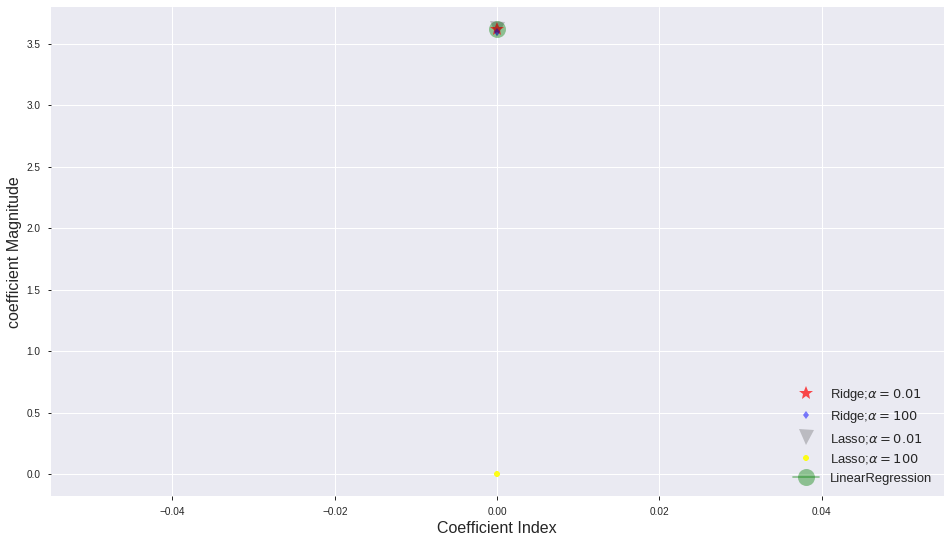

In [170]:
plt.figure(figsize=(16,9))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=15,color='red',
         label=r'Ridge;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge;$\alpha=100$',zorder=7)
plt.plot(lo.coef_,alpha=0.2,linestyle='none',marker='v',markersize=15,color='black',
         label=r'Lasso;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(lo100.coef_,alpha=0.9,linestyle='none',marker='8',markersize=6,color='yellow',
         label=r'Lasso;$\alpha=100$',zorder=7)

#alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,marker='o',markersize=17,color='green',label='LinearRegression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [125]:
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge,ElasticNet

In [126]:
Lasso_CV=LassoCV()
Ridge_CV=RidgeCV()
rr=Ridge()
Lo=Lasso()
ENET=ElasticNet()

In [128]:
Lasso_CV.fit(X_traine.values.reshape(-1,1),Y_traine)
Ridge_CV.fit(X_traine.values.reshape(-1,1),Y_traine)
rr.fit(X_traine.values.reshape(-1,1),Y_traine)
Lo.fit(X_traine.values.reshape(-1,1),Y_traine)
ENET.fit(X_traine.values.reshape(-1,1),Y_traine)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
Predicate=pd.DataFrame({'Lasso_CV_pred':Lasso_CV.predict(X_test.values.reshape(-1,1)),
            'Ridge_CV_pred':Ridge_CV.predict(X_test.values.reshape(-1,1)),
                        'rr':rr.predict(X_test.values.reshape(-1,1)),
                        'Lo':Lo.predict(X_test.values.reshape(-1,1)),'Actual_data':Y_test})
Predicate

,Lasso_CV_pred,Ridge_CV_pred,rr,Lo,Actual_data
28,47.399312,42.538980,42.515351,42.549022,27.9
21,53.961562,49.772547,49.752181,49.781201,48.7
45,158.957557,165.509607,165.541460,165.496070,73.4
46,60.523812,57.006113,56.989011,57.013380,21.3
33,40.837062,35.305414,35.278521,35.316842,40.3
37,63.804936,60.622896,60.607426,60.629470,58.1
55,119.584059,122.108209,122.120480,122.102994,133.3
10,40.837062,35.305414,35.278521,35.316842,20.9
43,145.833058,151.042474,151.067800,151.031711,152.8
34,96.616185,96.790727,96.791576,96.790367,161.5


In [130]:
#Recursive Feature Elimination:The Syntax
#import the class containing the feature selection method 
from sklearn.feature_selection import RFE

In [131]:
#create an instance of the class
rfeMod=RFE(rr,n_features_to_select=7)

In [171]:
#fit the instance on the data and then predict the expected value
rfeMod=rfeMod.fit(X_traine,Y_traine)
Y_predict=rfeMod.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 41  14  31  13   6   3  23  29  13  23  26   4  25  40   6 108   4  57
  53  55   9  13  30   3   9   6  17  19  48  23  13   3  15   2  11  14
  24   0   8  20  16  61  45  10  24   8   4  27   7  11].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [152]:
rr

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [154]:
rr100

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [155]:
lo

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [156]:
lo100

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)